In [2]:
import matplotlib.pyplot as plt
from matplotlib import rcParams
import pandas as pd
import numpy as np
import seaborn as sns

rcParams['font.sans-serif'] = ['SimHei']

In [3]:
df = pd.read_csv('data/house_sales.csv')
df.head()

,city,address,area,floor,name,price,province,rooms,toward,unit,year,origin_url
0,合肥,龙岗-临泉东路和王岗大道交叉口东南角,90㎡,中层（共18层）,圣地亚哥,128万,安徽,3室2厅,南北向,14222元/㎡,2013年建,https://hf.esf.fang.com/chushou/3_404230646.htm
1,合肥,龙岗-临泉东路和王岗大道交叉口东南角,90㎡,中层（共18层）,圣地亚哥,128万,安徽,3室2厅,南北向,14222元/㎡,2013年建,https://hf.esf.fang.com/chushou/3_404230646.htm
2,合肥,生态公园-淮海大道与大众路交口,95㎡,中层（共18层）,正荣·悦都荟,132万,安徽,3室2厅,南向,13895元/㎡,2019年建,https://hf.esf.fang.com/chushou/3_404304901.htm
3,合肥,生态公园-淮海大道与大众路交口,95㎡,中层（共18层）,正荣·悦都荟,132万,安徽,3室2厅,南向,13895元/㎡,2019年建,https://hf.esf.fang.com/chushou/3_404304901.htm
4,合肥,撮镇-文一名门金隅裕溪路与东风大道交口,37㎡,中层（共22层）,文一名门金隅,32万,安徽,2室1厅,南北向,8649元/㎡,2017年建,https://hf.esf.fang.com/chushou/3_404372096.htm


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106118 entries, 0 to 106117
Data columns (total 12 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   city        106118 non-null  object
 1   address     104452 non-null  object
 2   area        105324 non-null  object
 3   floor       104024 non-null  object
 4   name        105564 non-null  object
 5   price       105564 non-null  object
 6   province    106118 non-null  object
 7   rooms       104036 non-null  object
 8   toward      105240 non-null  object
 9   unit        105564 non-null  object
 10  year        57736 non-null   object
 11  origin_url  105564 non-null  object
dtypes: object(12)
memory usage: 9.7+ MB


In [5]:
df.drop(columns='origin_url', inplace=True)

In [6]:
df.isna().sum()
df.dropna(inplace=True)

In [7]:
df.drop_duplicates(inplace=True)

In [8]:
df['area'] = df['area'].str.replace('㎡', '').astype(float)

In [9]:
df['price'] = df['price'].str.replace('万', '').astype(float)

In [10]:
df['unit'] = df['unit'].str.replace('元/㎡', '').astype(float)

In [11]:
df['year'] = df['year'].str.replace('年建', '').astype(int)

In [12]:
df['toward'] = df['toward'].astype('category')

In [13]:
df = df[(df['area']<600) & (df['area']>20)]

In [14]:
q1 = df['price'].quantile(0.25)
q3 = df['price'].quantile(0.75)
iqr = q3-q1
low_price = q1 - 1.5*iqr
high_price = q3 + 1.5*iqr
df = df[(df['price']<high_price) & (df['price']>low_price)]

In [15]:
df['district'] = df['address'].str.split('-').str[0]

In [16]:
def fun1(floor):
    if pd.isna(floor):
        return 'unknow'
    elif '低' in floor:
        return 'low floor'
    elif '中' in floor:
        return 'median floor'
    elif '高' in floor:
        return 'high floor'
    else:
        return 'unknow'
df['floor_type2'] = df['floor'].apply(fun1).astype('category')

In [17]:
df['zxs'] = df['city'].apply(lambda city: 1 if city in ['北京', '上海', '天津', '重庆'] else 0)

In [18]:
df['bedrooms'] = df['rooms'].str.split('室').str[0].astype(int)

In [19]:
# df['bedrooms'] = df['rooms'].str.split('室').str[1].str.split('厅').str[0].astype(int)
df['livingrooms'] = df['rooms'].str.extract(r'(\d+)厅').astype(int)

In [20]:
import datetime
current_year = datetime.datetime.now().year
df['building_age'] = current_year - df['year']

In [21]:
df['price_labels'] = pd.cut(df['price'], bins=4, labels=['low_price', 'median_price', 'high_price', 'too_high_price'])

In [25]:
a = df[['price', 'area', 'unit', 'building_age']].corr() # 相关系数
a['price'].sort_values(ascending=False)[1:]

unit            0.742731
area            0.452523
building_age    0.091520
Name: price, dtype: float64

<Axes: >

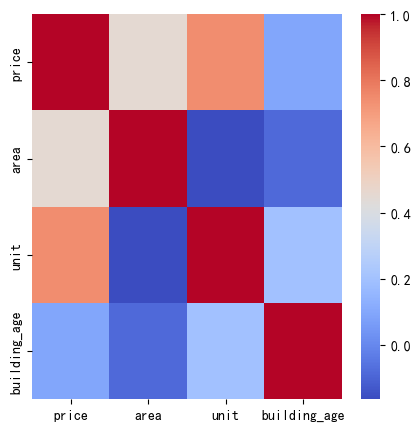

In [28]:
plt.figure(figsize=(5, 5))
sns.heatmap(a, cmap="coolwarm")

In [29]:
df.describe()

,area,price,unit,year,zxs,bedrooms,livingrooms,building_age
count,26135.000000,26135.000000,26135.000000,26135.000000,26135.000000,26135.000000,26135.000000,26135.000000
mean,103.755810,117.208370,11610.131012,2013.072240,0.008800,2.714444,1.848556,11.927760
std,33.995994,60.967675,5824.245273,6.019342,0.093399,0.800768,0.407353,6.019342
min,21.000000,9.000000,1000.000000,1976.000000,0.000000,0.000000,0.000000,2.000000
25%,85.005000,72.000000,7587.000000,2011.000000,0.000000,2.000000,2.000000,8.000000
50%,100.000000,103.000000,10312.000000,2015.000000,0.000000,3.000000,2.000000,10.000000
75%,123.000000,150.000000,14184.000000,2017.000000,0.000000,3.000000,2.000000,14.000000
max,470.000000,306.000000,85288.000000,2023.000000,1.000000,9.000000,12.000000,49.000000


(array([ 991., 4810., 6499., 4613., 3362., 2226., 1333., 1055.,  691.,
         555.]),
 array([  9. ,  38.7,  68.4,  98.1, 127.8, 157.5, 187.2, 216.9, 246.6,
        276.3, 306. ]),
 <BarContainer object of 10 artists>)

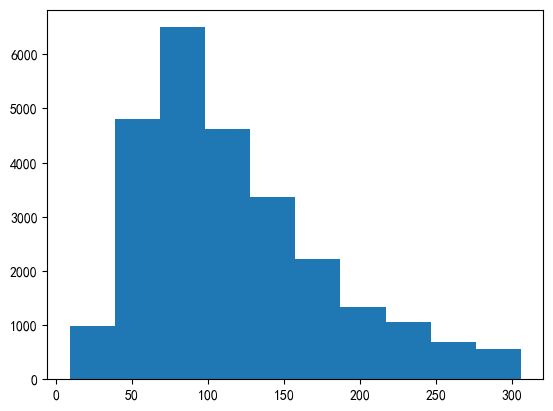

In [31]:
plt.subplot(111)
plt.hist(df['price'], bins=10)

<Axes: xlabel='price', ylabel='Count'>

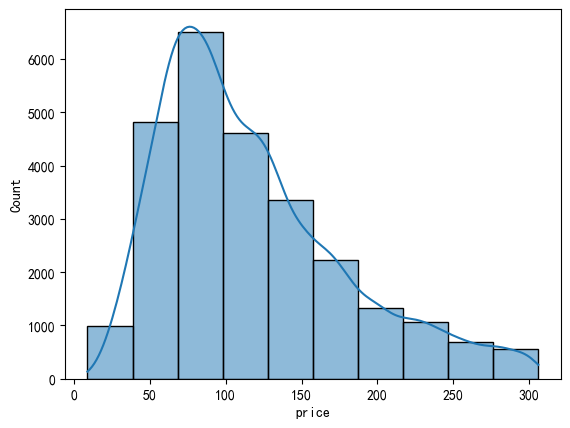

In [34]:
sns.histplot(data=df, x='price', bins=10, kde=True)

In [36]:
df['toward'].value_counts()
df.groupby('toward').agg({
    'price': ['mean', 'median'],
    'unit': 'median',
    'building_age': 'mean',
})

H:\Temp\ipykernel_6380\3875781900.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('toward').agg({


price            unit building_age
              mean median   median         mean
toward                                         
东北向     114.555333  100.0  12198.0    12.609524
东南向     115.542608  105.0  10864.0    10.951745
东向      110.158568   95.0  11421.0    12.761337
东西向      98.935099   82.0   9000.0    15.490066
北向       92.527907   75.5  11698.0    13.108527
南北向     119.472147  104.5  10000.0    12.073703
南向      114.555016  103.0  10759.0    11.551160
西北向     119.107594  105.0  12290.0    13.473684
西南向     139.711811  138.4  13333.0    13.452756
西向      102.662298   86.0  12528.0    13.385093

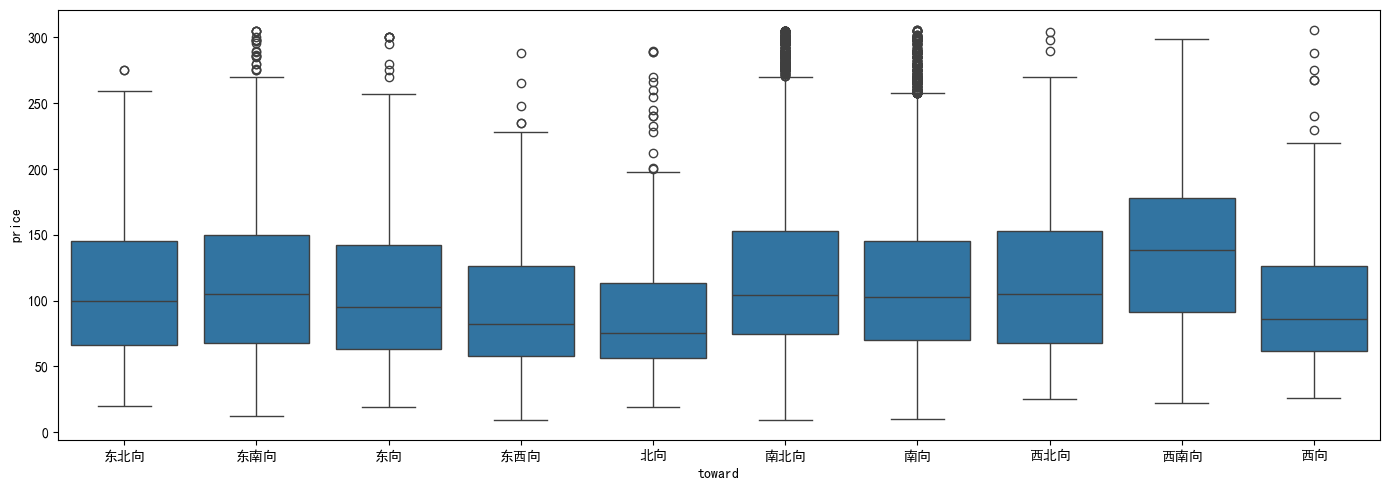

In [39]:
plt.figure(figsize=(14, 5))
sns.boxplot(data=df, x='toward', y='price')
plt.tight_layout()

In [ ]:
df.head()
# len(df)